In [2]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

In [3]:
instances_dict_path_train = './instances_dict_train.json'
with open(instances_dict_path_train, 'r') as f:
    instances_dict_train = json.load(f)
    
instances_dict_path_test = './instances_dict_test.json'
with open(instances_dict_path_test, 'r') as f:
    instances_dict_test = json.load(f)

smoothpur_1_4_train = np.load('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Train/SmoothPur_1_4.npy')
smoothpur_5_8_train = np.load('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Train/SmoothPur_5_8.npy')
smoothpur_9_10_train = np.load('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Train/SmoothPur_9_10.npy')
smoothpur_11_12_train = np.load('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Train/SmoothPur_11_12.npy')

smoothpur_1_4_test = np.load('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Test/SmoothPur_1_4.npy')
smoothpur_5_8_test = np.load('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Test/SmoothPur_5_8.npy')
smoothpur_9_10_test = np.load('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Test/SmoothPur_9_10.npy')
smoothpur_11_12_test = np.load('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Test/SmoothPur_11_12.npy')

print('TRAIN')
print(instances_dict_train)
print('length of instances_dict : ' ,len(instances_dict_train))
print('-' * 100)
print('length of smoothpur_1_4 : ' ,len(smoothpur_1_4_train))
print('length of smoothpur_5_8 : ' ,len(smoothpur_5_8_train))
print('length of smoothpur_9_10 : ' ,len(smoothpur_9_10_train))
print('length of smoothpur_11_12 : ' ,len(smoothpur_11_12_train))
print('-' * 100)
print('type of smoothpur_1_4 : ' , type(smoothpur_1_4_train))
print('type of smoothpur_5_8 : ' , type(smoothpur_5_8_train))
print('type of smoothpur_9_10 : ' , type(smoothpur_9_10_train))
print('type of smoothpur_11_12 : ' , type(smoothpur_11_12_train))
print('-' * 100)
print('shape of smoothpur_1_4 : ' , smoothpur_1_4_train.shape)
print('shape of smoothpur_5_8 : ' , smoothpur_5_8_train.shape)
print('shape of smoothpur_9_10 : ' , smoothpur_9_10_train.shape)
print('shape of smoothpur_11_12 : ' , smoothpur_11_12_train.shape)

print('TEST')
print(instances_dict_test)
print('length of instances_dict : ' ,len(instances_dict_test))
print('-' * 100)
print('length of smoothpur_1_4 : ' ,len(smoothpur_1_4_test))
print('length of smoothpur_5_8 : ' ,len(smoothpur_5_8_test))
print('length of smoothpur_9_10 : ' ,len(smoothpur_9_10_test))
print('length of smoothpur_11_12 : ' ,len(smoothpur_11_12_test))
print('-' * 100)
print('type of smoothpur_1_4 : ' , type(smoothpur_1_4_test))
print('type of smoothpur_5_8 : ' , type(smoothpur_5_8_test))
print('type of smoothpur_9_10 : ' , type(smoothpur_9_10_test))
print('type of smoothpur_11_12 : ' , type(smoothpur_11_12_test))
print('-' * 100)
print('shape of smoothpur_1_4 : ' , smoothpur_1_4_test.shape)
print('shape of smoothpur_5_8 : ' , smoothpur_5_8_test.shape)
print('shape of smoothpur_9_10 : ' , smoothpur_9_10_test.shape)
print('shape of smoothpur_11_12 : ' , smoothpur_11_12_test.shape)

TRAIN
{'0': 'HGJ003', '1': 'HG005_V2', '2': 'HG050_V2', '3': 'HF026', '4': 'HF010_V2', '5': 'HG052_V2', '6': 'HG015_V2', '7': 'HG056', '8': 'HG054', '9': 'HG031_V2', '10': 'HG053_v2', '11': 'HF011', '12': 'HF012', '13': 'HG057', '14': 'HG073', '15': 'HG037_V2', '16': 'HF019', '17': 'HGJ009', '18': 'HF009', '19': 'HF018', '20': 'HG002', '21': 'HG047', '22': 'HG014_V2', '23': 'HG036_V2', '24': 'HGJ012', '25': 'HF017', '26': 'HG009', '27': 'HG011', '28': 'HG010', '29': 'HG039_V2', '30': 'HG059', '31': 'HG035_V2', '32': 'HG001_V2', '33': 'HG016', '34': 'HG003', '35': 'HF009_V2', '36': 'HF022', '37': 'HG072', '38': 'HG038_V2', '39': 'HG039', '40': 'HG049', '41': 'HG064_V2', '42': 'HG055_V2', '43': 'HG002_V2', '44': 'HG006_V2', '45': 'HF016_V2', '46': 'HG067', '47': 'HG064', '48': 'HG023_V2', '49': 'HF027', '50': 'HG031', '51': 'HG034', '52': 'HG012_V2', '53': 'HG071', '54': 'HGJ004', '55': 'HG051', '56': 'HGJ008', '57': 'HG072_V2', '58': 'HG042', '59': 'HF031', '60': 'HG065', '61': 'HF030_V

In [4]:
def flatten_smoothpur_1_8(original_arr):
    arr_shape = original_arr.shape
    flattened_list = []
    for i in range(arr_shape[0]):
      for j in range(arr_shape[1]):
        flattened_list.append(original_arr[i][j][0])
        flattened_list.append(original_arr[i][j][1])
    flattened_arr = np.array(flattened_list)
    return flattened_arr

In [5]:
def flatten_smoothpur_9_12(original_arr):
    arr_shape = original_arr.shape
    flattened_x_list = []
    flattened_y_list = []
    for i in range(arr_shape[0]):
      for j in range(arr_shape[1]):
        flattened_x_list.append(original_arr[i][j][0][0])
        flattened_x_list.append(original_arr[i][j][0][1])
        flattened_y_list.append(original_arr[i][j][1][0])
        flattened_y_list.append(original_arr[i][j][1][1])
    flattened_x_arr = np.array(flattened_x_list)
    flattened_y_arr = np.array(flattened_y_list)
    return flattened_x_arr, flattened_y_arr

In [6]:
def downsample(signals, new_len):
    downsampled_signals = []
    for signal in signals:
        signal = signal.reshape(-1)  # Flatten the signal
        downsample_factor = len(signal) // new_len
        indices = np.arange(0, len(signal), downsample_factor)
        downsampled_signal = signal[indices[:new_len]]  # Ensure the length matches new_len
        downsampled_signals.append(downsampled_signal)
    return np.array(downsampled_signals)

In [7]:
newL = 500

print("TRAIN")


flat_1_4_train = flatten_smoothpur_1_8(smoothpur_1_4_train)
flat_5_8_train = flatten_smoothpur_1_8(smoothpur_5_8_train)
flat_x_9_10_train, flat_y_9_10_train = flatten_smoothpur_9_12(smoothpur_9_10_train)
flat_x_11_12_train, flat_y_11_12_train = flatten_smoothpur_9_12(smoothpur_11_12_train)

mean_1_4_train = np.nanmean(flat_1_4_train)
std_1_4_train = np.nanstd(flat_1_4_train)
flat_1_4_normalized_train = (flat_1_4_train - mean_1_4_train) / std_1_4_train

mean_5_8_train = np.nanmean(flat_5_8_train)
std_5_8_train = np.nanstd(flat_5_8_train)
flat_5_8_normalized_train = (flat_5_8_train - mean_5_8_train) / std_5_8_train

mean_x_9_10_train = np.nanmean(flat_x_9_10_train)
std_x_9_10_train = np.nanstd(flat_x_9_10_train)
flat_x_9_10_normalized_train = (flat_x_9_10_train - mean_x_9_10_train) / std_x_9_10_train

mean_y_9_10_train = np.nanmean(flat_y_9_10_train)
std_y_9_10_train = np.nanstd(flat_y_9_10_train)
flat_y_9_10_normalized_train = (flat_y_9_10_train - mean_y_9_10_train) / std_y_9_10_train

mean_x_11_12_train = np.nanmean(flat_x_11_12_train)
std_x_11_12_train = np.nanstd(flat_x_11_12_train)
flat_x_11_12_normalized_train = (flat_x_11_12_train - mean_x_11_12_train) / std_x_11_12_train

mean_y_11_12_train = np.nanmean(flat_y_11_12_train)
std_y_11_12_train = np.nanstd(flat_y_11_12_train)
flat_y_11_12_normalized_train = (flat_y_11_12_train - mean_y_11_12_train) / std_y_11_12_train

down_1_4_train = downsample(flat_1_4_normalized_train, newL)
down_5_8_train = downsample(flat_5_8_normalized_train, newL)
down_x_9_10_train, down_y_9_10_train = downsample(flat_x_9_10_normalized_train, newL), downsample(flat_y_9_10_normalized_train, newL)
down_x_11_12_train, down_y_11_12_train = downsample(flat_x_11_12_normalized_train, newL), downsample(flat_y_11_12_normalized_train, newL)

print('shape of flattened smoothpur_1_4 :', flat_1_4_normalized_train.shape)
print('shape of flattened smoothpur_5_8 :', flat_5_8_normalized_train.shape)
print('shape of flattened smoothpur_x_9_10 :', flat_x_9_10_normalized_train.shape)
print('shape of flattened smoothpur_y_9_10 :', flat_y_9_10_normalized_train.shape)
print('shape of flattened smoothpur_x_11_12 :', flat_x_11_12_normalized_train.shape)
print('shape of flattened smoothpur_y_11_12 :', flat_y_11_12_normalized_train.shape)
print('-' * 100)
print('shape of downsampled smoothpur_1_4 :', down_1_4_train.shape)
print('shape of downsampled smoothpur_5_8 :', down_5_8_train.shape)
print('shape of downsampled smoothpur_x_9_10 :', down_x_9_10_train.shape)
print('shape of downsampled smoothpur_y_9_10 :', down_y_9_10_train.shape)
print('shape of downsampled smoothpur_x_11_12 :', down_x_11_12_train.shape)
print('shape of downsampled smoothpur_y_11_12 :', down_y_11_12_train.shape)


print("TEST")


flat_1_4_test = flatten_smoothpur_1_8(smoothpur_1_4_test)
flat_5_8_test = flatten_smoothpur_1_8(smoothpur_5_8_test)
flat_x_9_10_test, flat_y_9_10_test = flatten_smoothpur_9_12(smoothpur_9_10_test)
flat_x_11_12_test, flat_y_11_12_test = flatten_smoothpur_9_12(smoothpur_11_12_test)

mean_1_4_test = np.nanmean(flat_1_4_test)
std_1_4_test = np.nanstd(flat_1_4_test)
flat_1_4_normalized_test = (flat_1_4_test - mean_1_4_test) / std_1_4_test

mean_5_8_test = np.nanmean(flat_5_8_test)
std_5_8_test = np.nanstd(flat_5_8_test)
flat_5_8_normalized_test = (flat_5_8_test - mean_5_8_test) / std_5_8_test

mean_x_9_10_test = np.nanmean(flat_x_9_10_test)
std_x_9_10_test = np.nanstd(flat_x_9_10_test)
flat_x_9_10_normalized_test = (flat_x_9_10_test - mean_x_9_10_test) / std_x_9_10_test

mean_y_9_10_test = np.nanmean(flat_y_9_10_test)
std_y_9_10_test = np.nanstd(flat_y_9_10_test)
flat_y_9_10_normalized_test = (flat_y_9_10_test - mean_y_9_10_test) / std_y_9_10_test

mean_x_11_12_test = np.nanmean(flat_x_11_12_test)
std_x_11_12_test = np.nanstd(flat_x_11_12_test)
flat_x_11_12_normalized_test = (flat_x_11_12_test - mean_x_11_12_test) / std_x_11_12_test

mean_y_11_12_test = np.nanmean(flat_y_11_12_test)
std_y_11_12_test = np.nanstd(flat_y_11_12_test)
flat_y_11_12_normalized_test = (flat_y_11_12_test - mean_y_11_12_test) / std_y_11_12_test

down_1_4_test = downsample(flat_1_4_normalized_test, newL)
down_5_8_test = downsample(flat_5_8_normalized_test, newL)
down_x_9_10_test, down_y_9_10_test = downsample(flat_x_9_10_normalized_test, newL), downsample(flat_y_9_10_normalized_test, newL)
down_x_11_12_test, down_y_11_12_test = downsample(flat_x_11_12_normalized_test, newL), downsample(flat_y_11_12_normalized_test, newL)

print('shape of flattened smoothpur_1_4 :', flat_1_4_normalized_test.shape)
print('shape of flattened smoothpur_5_8 :', flat_5_8_normalized_test.shape)
print('shape of flattened smoothpur_x_9_10 :', flat_x_9_10_normalized_test.shape)
print('shape of flattened smoothpur_y_9_10 :', flat_y_9_10_normalized_test.shape)
print('shape of flattened smoothpur_x_11_12 :', flat_x_11_12_normalized_test.shape)
print('shape of flattened smoothpur_y_11_12 :', flat_y_11_12_normalized_test.shape)
print('-' * 100)
print('shape of downsampled smoothpur_1_4 :', down_1_4_test.shape)
print('shape of downsampled smoothpur_5_8 :', down_5_8_test.shape)
print('shape of downsampled smoothpur_x_9_10 :', down_x_9_10_test.shape)
print('shape of downsampled smoothpur_y_9_10 :', down_y_9_10_test.shape)
print('shape of downsampled smoothpur_x_11_12 :', down_x_11_12_test.shape)
print('shape of downsampled smoothpur_y_11_12 :', down_y_11_12_test.shape)

TRAIN
shape of flattened smoothpur_1_4 : (1096, 15000)
shape of flattened smoothpur_5_8 : (1096, 15000)
shape of flattened smoothpur_x_9_10 : (548, 15000)
shape of flattened smoothpur_y_9_10 : (548, 15000)
shape of flattened smoothpur_x_11_12 : (548, 15000)
shape of flattened smoothpur_y_11_12 : (548, 15000)
----------------------------------------------------------------------------------------------------
shape of downsampled smoothpur_1_4 : (1096, 500)
shape of downsampled smoothpur_5_8 : (1096, 500)
shape of downsampled smoothpur_x_9_10 : (548, 500)
shape of downsampled smoothpur_y_9_10 : (548, 500)
shape of downsampled smoothpur_x_11_12 : (548, 500)
shape of downsampled smoothpur_y_11_12 : (548, 500)
TEST
shape of flattened smoothpur_1_4 : (280, 15000)
shape of flattened smoothpur_5_8 : (280, 15000)
shape of flattened smoothpur_x_9_10 : (140, 15000)
shape of flattened smoothpur_y_9_10 : (140, 15000)
shape of flattened smoothpur_x_11_12 : (140, 15000)
shape of flattened smoothpur_y

In [8]:
#TRAIN

# Process flat_1_4
long_signals_1_4_train = []
idxs_1_4_train = []
for idx, i in enumerate(flat_1_4_normalized_train):
    if not np.isnan(i).sum():  # Check if there are no NaN values
        idxs_1_4_train.append(idx)
        long_signals_1_4_train.append(i)

short_signals_1_4_train = [down_1_4_train[idx] for idx in idxs_1_4_train]

# Convert lists to numpy arrays
long_signals_1_4_train = np.array(long_signals_1_4_train)
short_signals_1_4_train = np.array(short_signals_1_4_train)

# Process flat_5_8
long_signals_5_8_train = []
idxs_5_8_train = []
for idx, i in enumerate(flat_5_8_normalized_train):
    if not np.isnan(i).sum():  # Check if there are no NaN values
        idxs_5_8_train.append(idx)
        long_signals_5_8_train.append(i)

short_signals_5_8_train = [down_5_8_train[idx] for idx in idxs_5_8_train]

# Convert lists to numpy arrays
long_signals_5_8_train = np.array(long_signals_5_8_train)
short_signals_5_8_train = np.array(short_signals_5_8_train)

# Process flat_x_9_10
long_signals_x_9_10_train = []
idxs_x_9_10_train = []
for idx, i in enumerate(flat_x_9_10_normalized_train):
    if not np.isnan(i).sum():  # Check if there are no NaN values
        idxs_x_9_10_train.append(idx)
        long_signals_x_9_10_train.append(i)

short_signals_x_9_10_train = [down_x_9_10_train[idx] for idx in idxs_x_9_10_train]

# Convert lists to numpy arrays
long_signals_x_9_10_train = np.array(long_signals_x_9_10_train)
short_signals_x_9_10_train = np.array(short_signals_x_9_10_train)

# Process flat_y_9_10
long_signals_y_9_10_train = []
idxs_y_9_10_train = []
for idx, i in enumerate(flat_y_9_10_normalized_train):
    if not np.isnan(i).sum():  # Check if there are no NaN values
        idxs_y_9_10_train.append(idx)
        long_signals_y_9_10_train.append(i)

short_signals_y_9_10_train = [down_y_9_10_train[idx] for idx in idxs_y_9_10_train]

# Convert lists to numpy arrays
long_signals_y_9_10_train = np.array(long_signals_y_9_10_train)
short_signals_y_9_10_train = np.array(short_signals_y_9_10_train)

# Process flat_x_11_12
long_signals_x_11_12_train = []
idxs_x_11_12_train = []
for idx, i in enumerate(flat_x_11_12_normalized_train):
    if not np.isnan(i).sum():  # Check if there are no NaN values
        idxs_x_11_12_train.append(idx)
        long_signals_x_11_12_train.append(i)

short_signals_x_11_12_train = [down_x_11_12_train[idx] for idx in idxs_x_11_12_train]

# Convert lists to numpy arrays
long_signals_x_11_12_train = np.array(long_signals_x_11_12_train)
short_signals_x_11_12_train = np.array(short_signals_x_11_12_train)

# Process flat_y_11_12
long_signals_y_11_12_train = []
idxs_y_11_12_train = []
for idx, i in enumerate(flat_y_11_12_normalized_train):
    if not np.isnan(i).sum():  # Check if there are no NaN values
        idxs_y_11_12_train.append(idx)
        long_signals_y_11_12_train.append(i)

short_signals_y_11_12_train = [down_y_11_12_train[idx] for idx in idxs_y_11_12_train]

# Convert lists to numpy arrays
long_signals_y_11_12_train = np.array(long_signals_y_11_12_train)
short_signals_y_11_12_train = np.array(short_signals_y_11_12_train)

# Append all long signals and short signals
long_signals_train = np.concatenate([
    long_signals_1_4_train,
    long_signals_5_8_train,
    long_signals_x_9_10_train,
    long_signals_y_9_10_train,
    long_signals_x_11_12_train,
    long_signals_y_11_12_train
], axis=0)

short_signals_train = np.concatenate([
    short_signals_1_4_train,
    short_signals_5_8_train,
    short_signals_x_9_10_train,
    short_signals_y_9_10_train,
    short_signals_x_11_12_train,
    short_signals_y_11_12_train
], axis=0)



In [9]:
#TEST

# Process flat_1_4
long_signals_1_4_test = []
idxs_1_4_test = []
for idx, i in enumerate(flat_1_4_normalized_test):
    if not np.isnan(i).sum():  # Check if there are no NaN values
        idxs_1_4_test.append(idx)
        long_signals_1_4_test.append(i)

short_signals_1_4_test = [down_1_4_test[idx] for idx in idxs_1_4_test]

# Convert lists to numpy arrays
long_signals_1_4_test = np.array(long_signals_1_4_test)
short_signals_1_4_test = np.array(short_signals_1_4_test)

# Process flat_5_8
long_signals_5_8_test = []
idxs_5_8_test = []
for idx, i in enumerate(flat_5_8_normalized_test):
    if not np.isnan(i).sum():  # Check if there are no NaN values
        idxs_5_8_test.append(idx)
        long_signals_5_8_test.append(i)

short_signals_5_8_test = [down_5_8_test[idx] for idx in idxs_5_8_test]

# Convert lists to numpy arrays
long_signals_5_8_test = np.array(long_signals_5_8_test)
short_signals_5_8_test = np.array(short_signals_5_8_test)

# Process flat_x_9_10
long_signals_x_9_10_test = []
idxs_x_9_10_test = []
for idx, i in enumerate(flat_x_9_10_normalized_test):
    if not np.isnan(i).sum():  # Check if there are no NaN values
        idxs_x_9_10_test.append(idx)
        long_signals_x_9_10_test.append(i)

short_signals_x_9_10_test = [down_x_9_10_test[idx] for idx in idxs_x_9_10_test]

# Convert lists to numpy arrays
long_signals_x_9_10_test = np.array(long_signals_x_9_10_test)
short_signals_x_9_10_test = np.array(short_signals_x_9_10_test)

# Process flat_y_9_10
long_signals_y_9_10_test = []
idxs_y_9_10_test = []
for idx, i in enumerate(flat_y_9_10_normalized_test):
    if not np.isnan(i).sum():  # Check if there are no NaN values
        idxs_y_9_10_test.append(idx)
        long_signals_y_9_10_test.append(i)

short_signals_y_9_10_test = [down_y_9_10_test[idx] for idx in idxs_y_9_10_test]

# Convert lists to numpy arrays
long_signals_y_9_10_test = np.array(long_signals_y_9_10_test)
short_signals_y_9_10_test = np.array(short_signals_y_9_10_test)

# Process flat_x_11_12
long_signals_x_11_12_test = []
idxs_x_11_12_test = []
for idx, i in enumerate(flat_x_11_12_normalized_test):
    if not np.isnan(i).sum():  # Check if there are no NaN values
        idxs_x_11_12_test.append(idx)
        long_signals_x_11_12_test.append(i)

short_signals_x_11_12_test = [down_x_11_12_test[idx] for idx in idxs_x_11_12_test]

# Convert lists to numpy arrays
long_signals_x_11_12_test = np.array(long_signals_x_11_12_test)
short_signals_x_11_12_test = np.array(short_signals_x_11_12_test)

# Process flat_y_11_12
long_signals_y_11_12_test = []
idxs_y_11_12_test = []
for idx, i in enumerate(flat_y_11_12_normalized_test):
    if not np.isnan(i).sum():  # Check if there are no NaN values
        idxs_y_11_12_test.append(idx)
        long_signals_y_11_12_test.append(i)

short_signals_y_11_12_test = [down_y_11_12_test[idx] for idx in idxs_y_11_12_test]

# Convert lists to numpy arrays
long_signals_y_11_12_test = np.array(long_signals_y_11_12_test)
short_signals_y_11_12_test = np.array(short_signals_y_11_12_test)

# Append all long signals and short signals
long_signals_test = np.concatenate([
    long_signals_1_4_test,
    long_signals_5_8_test,
    long_signals_x_9_10_test,
    long_signals_y_9_10_test,
    long_signals_x_11_12_test,
    long_signals_y_11_12_test
], axis=0)

short_signals_test = np.concatenate([
    short_signals_1_4_test,
    short_signals_5_8_test,
    short_signals_x_9_10_test,
    short_signals_y_9_10_test,
    short_signals_x_11_12_test,
    short_signals_y_11_12_test
], axis=0)



In [10]:
import numpy as np
from scipy.interpolate import interp1d
import torch

def initial_upsampling(downsampled_signals, target_length):
    upsampled_signals = []
    for signal in downsampled_signals:
        x_old = np.linspace(0, 1, len(signal))
        x_new = np.linspace(0, 1, target_length)
        interpolator = interp1d(x_old, signal, kind='cubic')  # You can use 'linear' or 'cubic'
        upsampled_signal = interpolator(x_new)
        upsampled_signals.append(upsampled_signal)
    return np.array(upsampled_signals)

# Example data generation (replace with your actual data)
downsampled_signals_train = short_signals_train.astype(np.float32)
original_signals_train = long_signals_train.astype(np.float32)

downsampled_signals_test = short_signals_test.astype(np.float32)
original_signals_test = long_signals_test.astype(np.float32)

# Initial Upsampling
initial_upsampled_signals_train = initial_upsampling(downsampled_signals_train, target_length=15000)
initial_upsampled_signals_test = initial_upsampling(downsampled_signals_test, target_length=15000)

# # Convert numpy arrays to PyTorch tensors with float32
initial_upsampled_signals_train = torch.tensor(initial_upsampled_signals_train, dtype=torch.float32)
original_signals_train = torch.tensor(original_signals_train, dtype=torch.float32)

initial_upsampled_signals_test = torch.tensor(initial_upsampled_signals_test, dtype=torch.float32)
original_signals_test = torch.tensor(original_signals_test, dtype=torch.float32)

print(f"Initial upsampled signals shape train: {initial_upsampled_signals_train.shape}")
print(f"Original signals shape train: {original_signals_train.shape}")
print(f"Initial upsampled signals shape test: {initial_upsampled_signals_test.shape}")
print(f"Original signals shape test: {original_signals_test.shape}")

Initial upsampled signals shape train: torch.Size([2508, 15000])
Original signals shape train: torch.Size([2508, 15000])
Initial upsampled signals shape test: torch.Size([604, 15000])
Original signals shape test: torch.Size([604, 15000])


In [11]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_interpolation(signal_idx):
    upsampled_signal = initial_upsampled_signals_train[signal_idx].numpy()
    original_signal = original_signals_train[signal_idx].numpy()

    # Calculate MSE loss
    mse_loss = np.mean((upsampled_signal - original_signal) ** 2)

    plt.figure(figsize=(18, 8))
    plt.plot(upsampled_signal, label='Upsampled Signal')
    plt.plot(original_signal, label='Original Signal', alpha=0.7)
    plt.title(f'Train Signal {signal_idx} - MSE Loss: {mse_loss:.4f}')
    plt.legend()
    plt.show()

# Create an interactive widget
interact(plot_interpolation, signal_idx=widgets.IntSlider(min=0, max=733, step=1, value=0))

interactive(children=(IntSlider(value=0, description='signal_idx', max=733), Output()), _dom_classes=('widget-…

<function __main__.plot_interpolation(signal_idx)>

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
from tqdm.notebook import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)




class ImprovedAutoencoder(nn.Module):
    def __init__(self):
        super(ImprovedAutoencoder, self).__init__()
        # Encoder
        self.encoder_conv1 = nn.Conv1d(1, 32, kernel_size=3, stride=1, padding=1)
        self.encoder_bn1 = nn.BatchNorm1d(32)
        
        self.encoder_conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=2, padding=1)  # Downsample
        self.encoder_bn2 = nn.BatchNorm1d(64)
        
        self.encoder_conv3 = nn.Conv1d(64, 128, kernel_size=3, stride=2, padding=1)  # Downsample
        self.encoder_bn3 = nn.BatchNorm1d(128)
        
        self.encoder_conv4 = nn.Conv1d(128, 256, kernel_size=3, stride=2, padding=1)  # Downsample
        self.encoder_bn4 = nn.BatchNorm1d(256)
        
        self.relu = nn.ReLU()
        # self.dropout = nn.Dropout(0.1)
    
        # Decoder
        self.decoder_convtrans1 = nn.ConvTranspose1d(256, 128, kernel_size=4, stride=2, padding=1)  # Upsample
        self.decoder_bn1 = nn.BatchNorm1d(128)
        
        self.decoder_convtrans2 = nn.ConvTranspose1d(128, 64, kernel_size=4, stride=2, padding=1)  # Upsample
        self.decoder_bn2 = nn.BatchNorm1d(64)
        
        self.decoder_convtrans3 = nn.ConvTranspose1d(64, 32, kernel_size=4, stride=2, padding=1)  # Upsample
        self.decoder_bn3 = nn.BatchNorm1d(32)
        
        self.decoder_conv1 = nn.Conv1d(32, 1, kernel_size=3, stride=1, padding=1)  # Output layer
        
    def forward(self, x):
        # Encoder
        x1 = self.encoder_conv1(x)
        x1 = self.encoder_bn1(x1)
        x1 = self.relu(x1)
        # x1 = self.dropout(x1)
        
        x2 = self.encoder_conv2(x1)
        x2 = self.encoder_bn2(x2)
        x2 = self.relu(x2)
        # x2 = self.dropout(x2)
        
        x3 = self.encoder_conv3(x2)
        x3 = self.encoder_bn3(x3)
        x3 = self.relu(x3)
        # x3 = self.dropout(x3)
        
        x4 = self.encoder_conv4(x3)
        x4 = self.encoder_bn4(x4)
        x4 = self.relu(x4)
        # x4 = self.dropout(x4)
        
        # Decoder
        x = self.decoder_convtrans1(x4)
        x = self.decoder_bn1(x)
        x = self.relu(x)
        # x = self.dropout(x)
        
        # Add skip connection from x3
        if x3.size(2) != x.size(2):
            x3 = F.interpolate(x3, size=x.size(2))
        x = x + x3
        
        x = self.decoder_convtrans2(x)
        x = self.decoder_bn2(x)
        x = self.relu(x)
        # x = self.dropout(x)
        
        # Add skip connection from x2
        if x2.size(2) != x.size(2):
            x2 = F.interpolate(x2, size=x.size(2))
        x = x + x2
        
        x = self.decoder_convtrans3(x)
        x = self.decoder_bn3(x)
        x = self.relu(x)
        # x = self.dropout(x)
        
        # Add skip connection from x1
        if x1.size(2) != x.size(2):
            x1 = F.interpolate(x1, size=x.size(2))
        x = x + x1
        
        # Output layer
        x = self.decoder_conv1(x)
        return x



cuda


In [ ]:
#Normal trainning


# Prepare Dataset and DataLoader
dataset = TensorDataset(initial_upsampled_signals_train, original_signals_train)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

batch_size = 32  # You can adjust this value
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


# Instantiate the model
model = ImprovedAutoencoder()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5, weight_decay=1e-5)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=20, factor=0.5)

# Initialize lists to store losses
train_losses = []
val_losses = []

# Training Loop with Early Stopping
num_epochs = 100
patience = 50  # Early stopping patience
best_val_loss = float('inf')
epochs_no_improve = 0
best_model_wts = None

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for upsampled, original in tqdm(train_loader):
        upsampled = upsampled.unsqueeze(1).to(device)  # Add channel dimension
        original = original.unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model(upsampled)
        loss = criterion(outputs, original)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * upsampled.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)  # Append training loss

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for upsampled, original in val_loader:
            upsampled = upsampled.unsqueeze(1).to(device)
            original = original.unsqueeze(1).to(device)

            outputs = model(upsampled)
            loss = criterion(outputs, original)
            val_loss += loss.item() * upsampled.size(0)

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)  # Append validation loss
    scheduler.step(val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_wts = model.state_dict()
        torch.save(model.state_dict(), 'best_improved_autoencoder_artificial.pth')
        print(f'Validation loss decreased ({best_val_loss:.6f}). Saving model...')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print('Early stopping!')
            break

# Load the best model weights
model.load_state_dict(best_model_wts)





  0%|          | 0/63 [00:00<?, ?it/s]

Epoch [1/100], Train Loss: 0.323194, Val Loss: 0.130402
Validation loss decreased (0.130402). Saving model...


  0%|          | 0/63 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# Plot the learning curve
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('learning_curve.png', dpi=300, bbox_inches='tight')  # Save as a .png file with high resolution


plt.show()

In [ ]:
#KFOLD TRAINNING

from sklearn.model_selection import KFold
import numpy as np

# Prepare Dataset and DataLoader
dataset = TensorDataset(initial_upsampled_signals_train, original_signals_train)


batch_size = 32  # You can adjust this value
num_epochs=100



# Number of folds for k-fold cross-validation
k_folds = 10

dataset_size = len(dataset)

# K-Fold cross-validator
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store results
fold_train_losses = []
fold_val_losses = []

# Loop over each fold
for fold, (train_indices, val_indices) in enumerate(kf.split(range(dataset_size))):
    print(f'Fold {fold+1}/{k_folds}')
    
    # Define training and validation datasets
    train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
    val_sampler = torch.utils.data.SubsetRandomSampler(val_indices)
    
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=32, sampler=train_sampler)
    val_loader = torch.utils.data.DataLoader(dataset, batch_size=32, sampler=val_sampler)
    
    # Instantiate the model for each fold
    model = ImprovedAutoencoder()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Define Loss and Optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=5e-5, weight_decay=1e-5)
    
    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=20, factor=0.5)

    # Initialize lists to store fold losses
    train_losses = []
    val_losses = []
    
    # Early stopping parameters
    patience = 50  # Early stopping patience
    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_model_wts = None
    
    # Training loop for the current fold
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for upsampled, original in tqdm(train_loader):
            upsampled = upsampled.unsqueeze(1).to(device)  # Add channel dimension
            original = original.unsqueeze(1).to(device)
            
            optimizer.zero_grad()
            outputs = model(upsampled)
            loss = criterion(outputs, original)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * upsampled.size(0)
        
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)
        
        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for upsampled, original in val_loader:
                upsampled = upsampled.unsqueeze(1).to(device)
                original = original.unsqueeze(1).to(device)

                outputs = model(upsampled)
                loss = criterion(outputs, original)
                val_loss += loss.item() * upsampled.size(0)
        
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        scheduler.step(val_loss)
        
        print(f'Fold {fold+1}, Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            best_model_wts = model.state_dict()
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print(f'Early stopping for fold {fold+1}!')
                break

    # Save the best model for the fold
    torch.save(best_model_wts, f'best_model_fold_{fold+1}.pth')

    # Append fold results
    fold_train_losses.append(train_losses)
    fold_val_losses.append(val_losses)

    # Reset model weights for the next fold
    model.load_state_dict(best_model_wts)





Fold 1/10


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [1/100], Train Loss: 0.517474, Val Loss: 0.016775


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [2/100], Train Loss: 0.037611, Val Loss: 0.000999


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [3/100], Train Loss: 0.007079, Val Loss: 0.000471


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [4/100], Train Loss: 0.005867, Val Loss: 0.000405


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [5/100], Train Loss: 0.005011, Val Loss: 0.000383


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [6/100], Train Loss: 0.005506, Val Loss: 0.000328


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [7/100], Train Loss: 0.005690, Val Loss: 0.000315


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [8/100], Train Loss: 0.004758, Val Loss: 0.000330


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [9/100], Train Loss: 0.004289, Val Loss: 0.000305


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [10/100], Train Loss: 0.005320, Val Loss: 0.000296


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [11/100], Train Loss: 0.005019, Val Loss: 0.000280


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [12/100], Train Loss: 0.004929, Val Loss: 0.000336


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [13/100], Train Loss: 0.004699, Val Loss: 0.000286


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [14/100], Train Loss: 0.004561, Val Loss: 0.000282


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [15/100], Train Loss: 0.004128, Val Loss: 0.000273


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [16/100], Train Loss: 0.004372, Val Loss: 0.000269


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [17/100], Train Loss: 0.004791, Val Loss: 0.000290


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [18/100], Train Loss: 0.004067, Val Loss: 0.000274


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [19/100], Train Loss: 0.004795, Val Loss: 0.000254


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [20/100], Train Loss: 0.004247, Val Loss: 0.000274


  0%|          | 0/71 [00:00<?, ?it/s]

Fold 1, Epoch [21/100], Train Loss: 0.004240, Val Loss: 0.000252


  0%|          | 0/71 [00:00<?, ?it/s]

In [3]:
# Aggregate and analyze the k-fold results
avg_train_losses = np.mean([np.mean(fold) for fold in fold_train_losses])
avg_val_losses = np.mean([np.mean(fold) for fold in fold_val_losses])

print(f'Average Train Loss Across Folds: {avg_train_losses:.6f}')
print(f'Average Validation Loss Across Folds: {avg_val_losses:.6f}')

# Plot learning curves across folds
plt.figure(figsize=(10, 5))
for fold in range(k_folds):
    plt.plot(fold_train_losses[fold], label=f'Fold {fold+1} Train Loss')
    plt.plot(fold_val_losses[fold], label=f'Fold {fold+1} Val Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve Across Folds')
plt.legend()
plt.grid(True)
plt.show()

# Generate Box Plot
# Prepare data for box plot
train_loss_per_fold = [np.mean(fold) for fold in fold_train_losses]
val_loss_per_fold = [np.mean(fold) for fold in fold_val_losses]

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(
    [train_loss_per_fold, val_loss_per_fold],
    labels=['Train Loss', 'Validation Loss'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue'),
    medianprops=dict(color='red'),
)

plt.ylabel('Loss')
plt.title('Box Plot of Losses Across Folds')
plt.grid(axis='y')
plt.show()

plt.savefig('Box_Plot_Autoencoder.png', dpi=300, bbox_inches='tight')  # Save as a .png file with high resolution


NameError: name 'np' is not defined

/tmp/ipykernel_370091/2327008641.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_fold_10.pth'))


Test Loss (MSE): 0.001929
Interp Loss (MSE): 0.003299


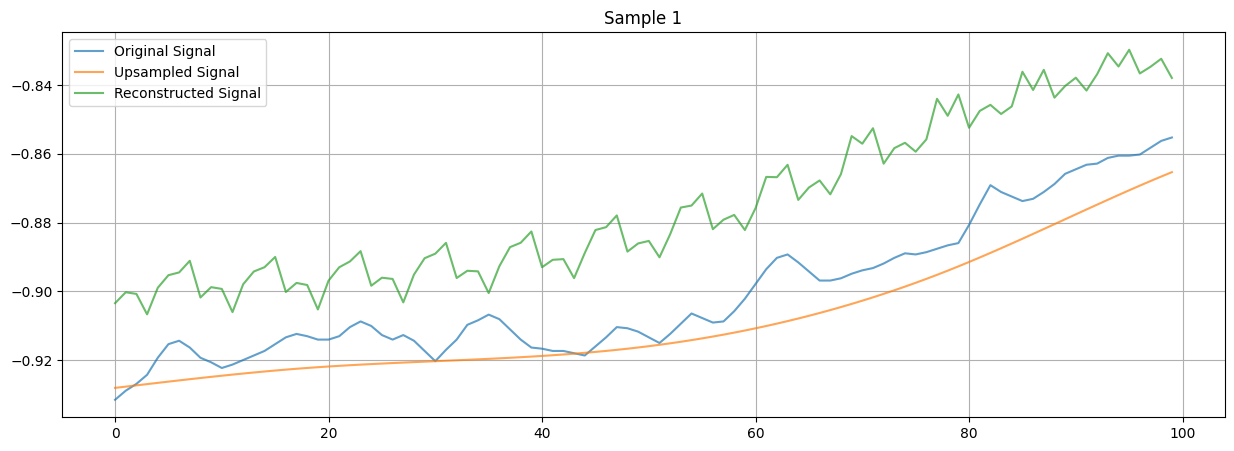

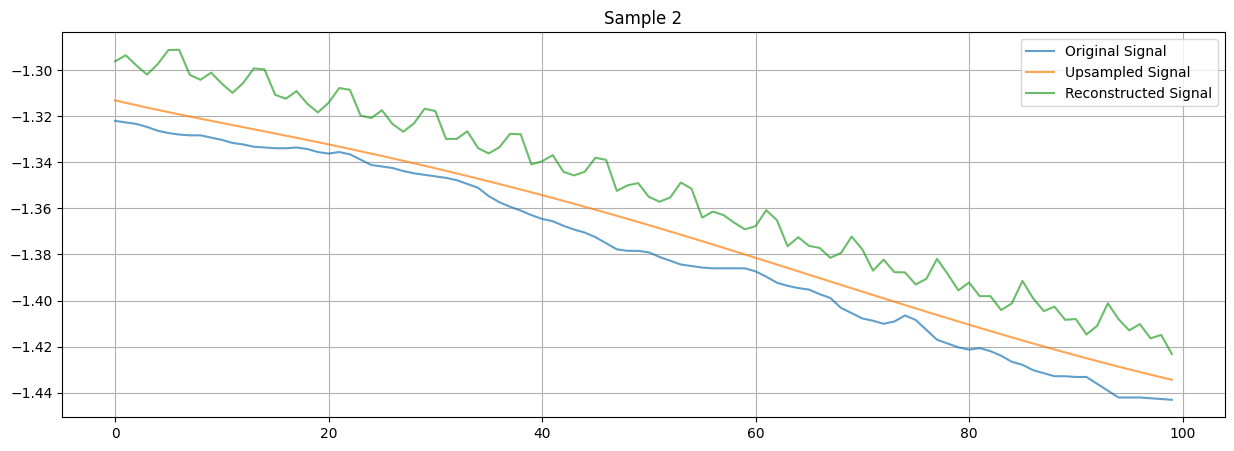

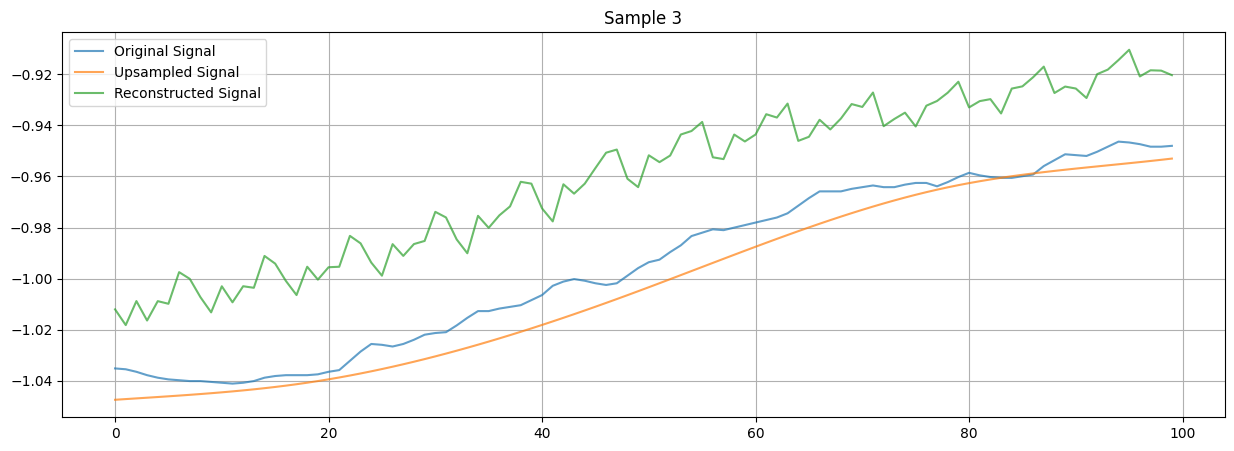

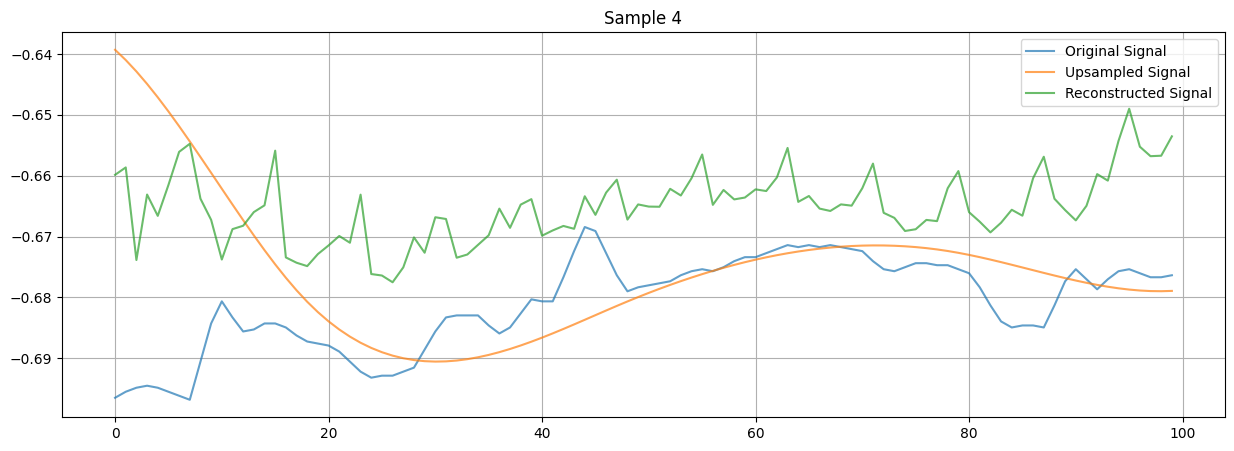

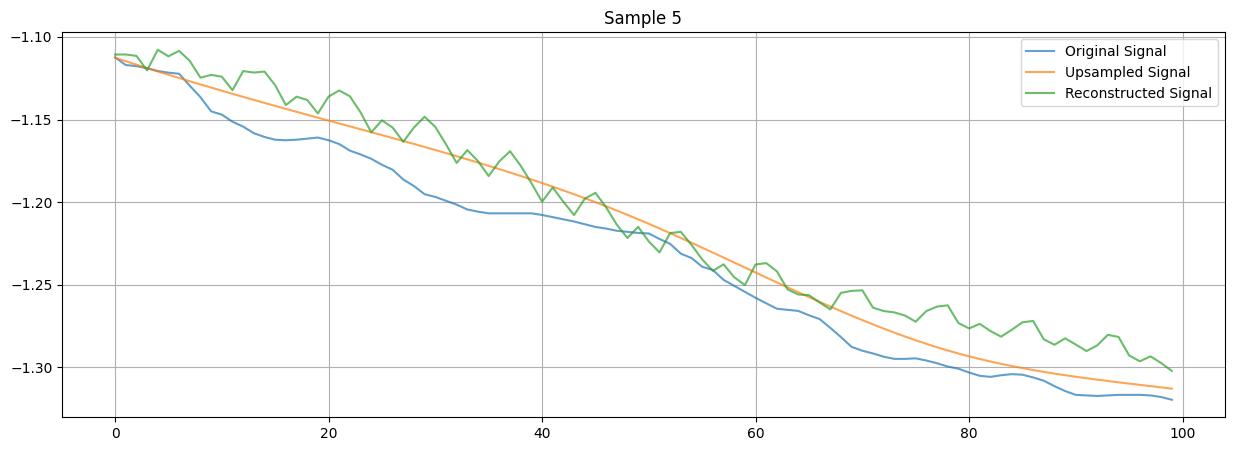

In [24]:
# Evaluation on Test Dataset
test_dataset = TensorDataset(initial_upsampled_signals_test, original_signals_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Instantiate the model
model = ImprovedAutoencoder()

model.load_state_dict(torch.load('best_model_fold_10.pth'))
model.to(device)

model.eval()  # Set model to evaluation mode
test_loss = 0.0
interp_loss = 0.0
diff_loss = 0.0
criterion = nn.MSELoss()  # Define loss function for evaluation
with torch.no_grad():
    for upsampled, original in test_loader:
        upsampled = upsampled.unsqueeze(1).to(device)  # Add channel dimension
        original = original.unsqueeze(1).to(device)

        outputs = model(upsampled)
        loss = criterion(outputs, original)
        loss_aux = criterion(upsampled, original)
        diff = criterion(outputs, upsampled)
        test_loss += loss.item() * upsampled.size(0)
        interp_loss += loss_aux.item() * upsampled.size(0)

test_loss /= len(test_loader.dataset)
interp_loss /= len(test_loader.dataset)

print(f'Test Loss (MSE): {test_loss:.6f}')
print(f'Interp Loss (MSE): {interp_loss:.6f}')


from matplotlib.widgets import Cursor

# Número de muestras a visualizar
num_samples_to_plot = 5  # Número de muestras a visualizar

for idx, (upsampled, original) in enumerate(test_loader):
    if idx >= num_samples_to_plot:
        break

    # Preprocesar tensores
    upsampled = upsampled.unsqueeze(1).to(device)
    original = original.unsqueeze(1).to(device)
    outputs = model(upsampled)

    # Convertir tensores a NumPy para graficar
    upsampled_np = upsampled.cpu().detach().numpy().squeeze()
    original_np = original.cpu().detach().numpy().squeeze()
    outputs_np = outputs.cpu().detach().numpy().squeeze()

    # Crear figura y eje
    fig, ax = plt.subplots(figsize=(15, 5))

    # Graficar señales
    ax.plot(original_np[0][4100:4200], label="Original Signal", alpha=0.7)
    ax.plot(upsampled_np[0][4100:4200], label="Upsampled Signal", alpha=0.7)
    ax.plot(outputs_np[0][4100:4200], label="Reconstructed Signal", alpha=0.7)

    # Configurar título, leyenda y rejilla
    ax.set_title(f"Sample {idx+1}")
    ax.legend()
    ax.grid(True)
    # Habilitar cursor interactivo
    cursor = Cursor(ax, useblit=True, color='red', linewidth=1)
    # Mostrar gráfico interactivo
    plt.show()




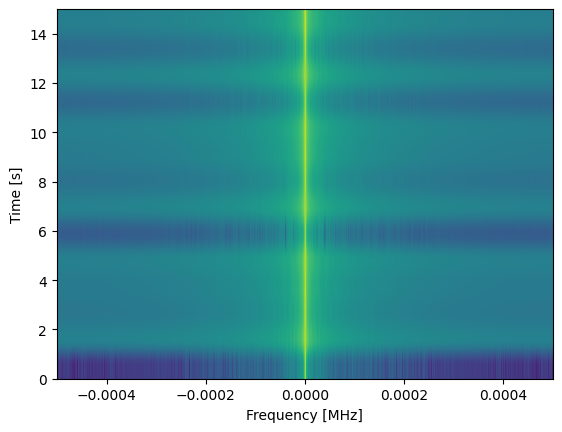

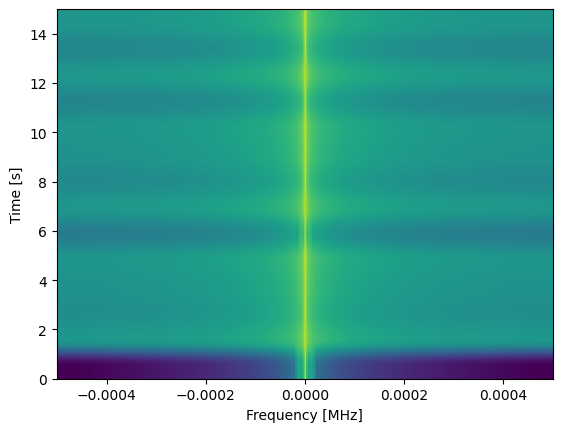

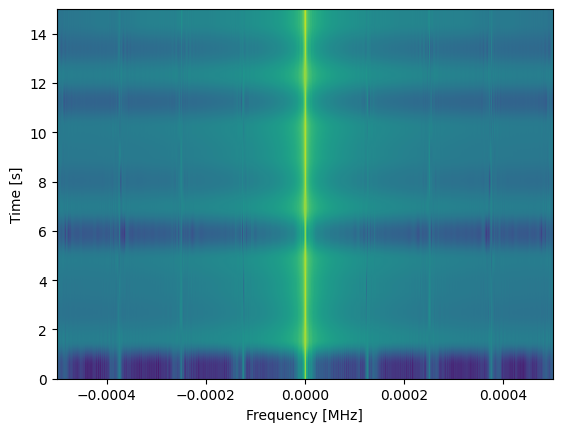

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Configurar los parámetros de la FFT
sample_rate = 1000  # Frecuencia de muestreo en Hz (ajusta según tus datos)

# Calcular el espectro de la señal
def plot_signal_spectrum(x, title):
    fft_size = 1024
    num_rows = len(x) // fft_size # // is an integer division which rounds down
    spectrogram = np.zeros((num_rows, fft_size))
    for i in range(num_rows):
       spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)

    plt.imshow(spectrogram, aspect='auto', extent = [sample_rate/-2/1e6, sample_rate/2/1e6, 0, len(x)/sample_rate])
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Time [s]")
    plt.title(title)
    plt.show()

# Ejemplo para las señales
num_samples_to_plot = 1  # Visualizar el espectro de la primera muestra
for idx, (upsampled, original) in enumerate(test_loader):
    if idx >= num_samples_to_plot:
        break

    # Preprocesar tensores
    upsampled = upsampled.unsqueeze(1).to(device)
    original = original.unsqueeze(1).to(device)
    outputs = model(upsampled)

    # Convertir tensores a NumPy
    upsampled_np = upsampled.cpu().detach().numpy().squeeze()
    original_np = original.cpu().detach().numpy().squeeze()
    outputs_np = outputs.cpu().detach().numpy().squeeze()

    # Visualizar espectros
    plot_signal_spectrum(original_np[0], title="Original Signal Spectrum")
    plot_signal_spectrum(upsampled_np[0], title="Upsampled Signal Spectrum")
    plot_signal_spectrum(outputs_np[0], title="Reconstructed Signal Spectrum")
